In [1]:
# importing libraries

#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np



In [2]:
#Load dataset
breast_cancer_data = datasets.load_breast_cancer()
print(breast_cancer_data)

print('Features : \n', breast_cancer_data.feature_names)
print('\nLabels : \n', breast_cancer_data.target_names)

print("\n",breast_cancer_data.data.shape)
print(breast_cancer_data.target.shape)



{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
#import the necessary module and train
from sklearn.model_selection import train_test_split

X=breast_cancer_data.data
Y=breast_cancer_data.target
#split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 111)



In [5]:
#Create a Decision Tree Classifier (using Gini)
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

# Predict the classes of test data
y_pred = clf.predict(X_test)
print("Predicted values:")
print(y_pred)



Predicted values:
[1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0
 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1
 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1]


In [6]:
# Model Accuracy
from sklearn import metrics
print("Confusion Matrix: ",
        metrics.confusion_matrix(y_test, y_pred))
print ("Accuracy : ",
    metrics.accuracy_score(y_test,y_pred)*100)
print("Report : ",
    metrics.classification_report(y_test, y_pred))

Confusion Matrix:  [[101   9]
 [ 19 156]]
Accuracy :  90.17543859649123
Report :                precision    recall  f1-score   support

           0       0.84      0.92      0.88       110
           1       0.95      0.89      0.92       175

    accuracy                           0.90       285
   macro avg       0.89      0.90      0.90       285
weighted avg       0.91      0.90      0.90       285



In [8]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='cancer_tree.dot',feature_names=list(breast_cancer_data.feature_names),
                class_names=list(breast_cancer_data.target_names), filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'cancer_tree.dot', '-o', 'cancer_tree.png', '-Gdpi=600'])

0

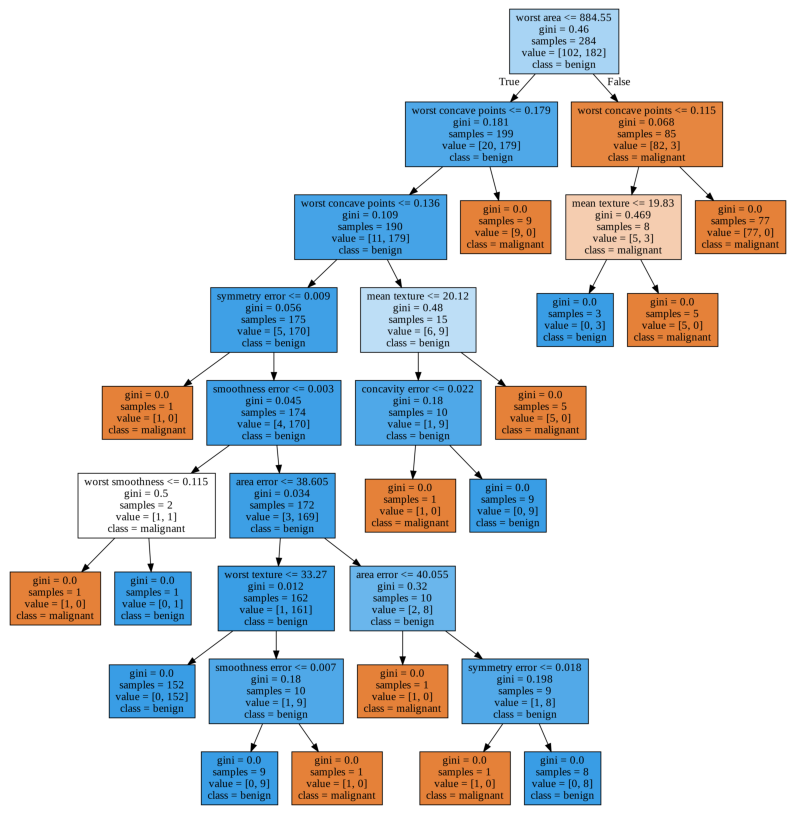

In [9]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('cancer_tree.png'))
plt.axis('off')
plt.show()